# Sample File monitor

In [1]:
import filemon.graph as gr
from filemon import FileMonitor
import subprocess
import time
file_route="/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384"
monitor_output_file="/home/gonzalo/DTN_monitor/output.txt"
fm = FileMonitor()
fm.monitor_file_name_async(file_route, 1587609600,
                                monitor_output_file)
time.sleep(1.0)
mode=0
thread  = gr.DataPlot(["File1"], [monitor_output_file])
thread.set_deadline(time.time()+600)
thread.daemon = True
thread.start()


In [1]:
import filemon.graph as gr
from filemon import FileMonitor
import subprocess
import time

from filemon.orchestrate import monitor_files
# Downloading files by running at /tmp/
# wget http://releases.ubuntu.com/16.04.3/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384 

file_routes = [
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.1",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.2",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.3",
]


expected_sizes = [1587609600, 1587609600, 1587609600, 1587609600]
titles = ["UbuntuIso_1-1.5GB", "UbuntuIso_2-1.5GB", "UbuntuIso_3-1.5GB", "UbuntuIso_4-1.5GB"]
ref_time = time.time()
deadlines = [ref_time+600, ref_time+400, ref_time+500,  ref_time+700]

""" This list corresponds to the id that will be used to do the PUTs in REST (same order as
file_routers varriable)
"""
rest_ids = ["f1", "f2", "f3", "f4"]

monitor_files(file_routes, expected_sizes, titles=titles, deadline_list=deadlines,
              y_factor=1.0/float(1024*1024),
              y_label="MB/s", y_lim=(0, 20),
              rest_reporting=True, file_ids=rest_ids,
              hostname="127.0.0.1", port=5000)



Exit of threads completed


In [1]:
from importlib import reload
import filemon.graph as gr
reload(gr)
from filemon import FileMonitor
import subprocess
import time
import filemon.orchestrate
reload(filemon.orchestrate)
from filemon.orchestrate import monitor_files, RestOrchestrator

# Downloading files by running at /tmp/
# wget http://releases.ubuntu.com/16.04.3/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384 

file_routes = [
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.1",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.2",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.3",
]


expected_sizes = [1587609600, 1587609600, 1587609600, 1587609600]
titles = ["UbuntuIso_1-1.5GB", "UbuntuIso_2-1.5GB", "UbuntuIso_3-1.5GB", "UbuntuIso_4-1.5GB"]
ref_time = time.time()
deadlines = [ref_time+600, ref_time+400, ref_time+500,  ref_time+700]

""" This list corresponds to the id that will be used to do the PUTs in REST (same order as
file_routers varriable)
"""
rest_ids = ["f1", "f2", "f3", "f4"]

"""
monitor_files(file_routes, expected_sizes, titles=titles, deadline_list=deadlines,
              y_factor=1.0/float(1024*1024),
              y_label="MB/s", y_lim=(0, 20),
              rest_reporting=True, file_ids=rest_ids,
              hostname="127.0.0.1", port=5000)
"""

ro = RestOrchestrator()
ro.init(rest_ids, titles, 
        y_factor=1.0/float(1024*1024),
        y_label="MB/s", y_lim=(0, 20),
        rest_reporting=True,
        hostname="127.0.0.1", port=5000)
"""

time.sleep(5)
ro.reconfigure("f1", "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384", 
                    expected_size=1587609600, deadline=ref_time+700)

time.sleep(5)
ro.reconfigure("f2", "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.1", 
                    expected_size=1587609600, deadline=ref_time+1000)
"""
time.sleep(5)
ro.process_changes(dict(f1=dict(file_route="/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384",
                               expected_size=1587609600,
                               deadline=ref_time+700),
                       f2=dict(file_route="/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.1",
                               expected_size=158760960,
                               deadline=ref_time+1000)))

time.sleep(5)
ro.process_changes(dict(f3=dict(file_route="/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384",
                               expected_size=1587609600,
                               deadline=ref_time+700),
                       f4=dict(file_route="/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.1",
                               expected_size=158760960,
                               deadline=ref_time+1000)))


ro.program_capture_stop()


Exit of threads completed


In [1]:
# This is how we should use it in the demo
from importlib import reload
import filemon.graph as gr
reload(gr)
from filemon import FileMonitor
import subprocess
import time
import filemon.orchestrate
reload(filemon.orchestrate)
from filemon.orchestrate import monitor_files, RestOrchestrator, RestPuller, IntCapturer

# Downloading files by running at /tmp/
# wget http://releases.ubuntu.com/16.04.3/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384 

""" This list corresponds to the id that will be used to do the PUTs in REST (same order as
file_routers varriable)
"""
rest_ids = ["f1", "f2", "f3", "f4"]
titles = ["UbuntuIso_1-1.5GB", "UbuntuIso_2-1.5GB", "UbuntuIso_3-1.5GB", "UbuntuIso_4-1.5GB"]

rest_reporting_host="127.0.0.1"
rest_reporting_port="5000"

rest_puller_host="127.0.0.1"
rest_puller_port="5000"
rest_puller_api="api/configs/"
rest_puller_update_period_s=1


ro = RestOrchestrator()
ro.init(rest_ids, titles, 
        y_factor=1.0/float(1024*1024),
        y_label="MB/s", y_lim=(0, 20),
        rest_reporting=True,
        hostname=rest_reporting_host, port=rest_reporting_port)

rp = RestPuller(rest_puller_host, rest_puller_port, rest_puller_api,
                ro.process_changes, update_period_s=rest_puller_update_period_s)
rp.start()

ic = IntCapturer()
ic.program_capture_stop([ro, rp])


Exit of threads completed


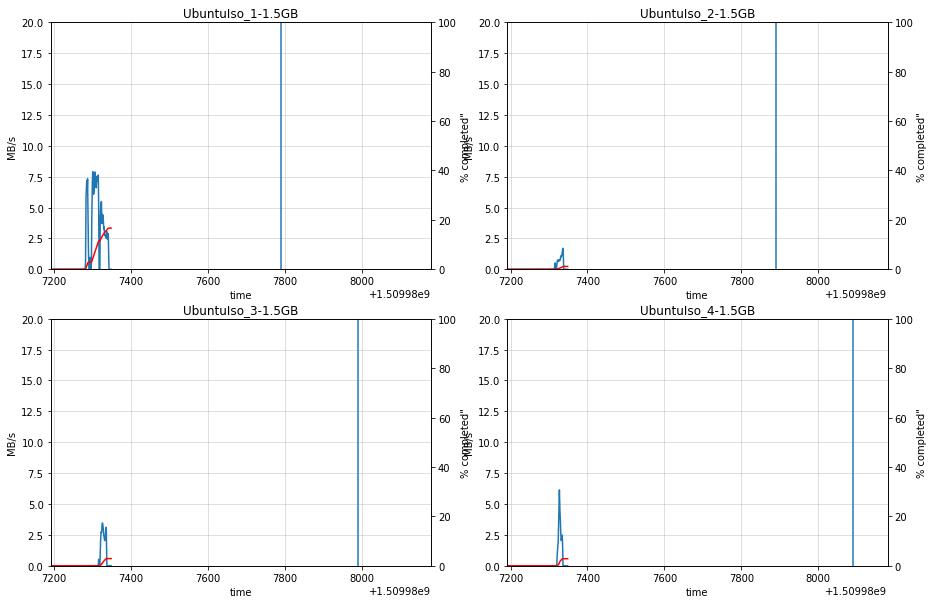

None

In [ ]:
# This is a test with a fake source of JSON configuration
from importlib import reload
import filemon.graph as gr
reload(gr)
from filemon import FileMonitor
import subprocess
import time
import filemon.orchestrate
reload(filemon.orchestrate)
from filemon.orchestrate import monitor_files, RestOrchestrator, RestPuller, IntCapturer
import requests_mock

# Downloading files by running at /tmp/
# wget http://releases.ubuntu.com/16.04.3/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384 

""" This list corresponds to the id that will be used to do the PUTs in REST (same order as
file_routers varriable)
"""
rest_ids = ["f1", "f2", "f3", "f4"]
titles = ["UbuntuIso_1-1.5GB", "UbuntuIso_2-1.5GB", "UbuntuIso_3-1.5GB", "UbuntuIso_4-1.5GB"]

rest_reporting_host="reportserver.com"
rest_reporting_port="5000"

rest_puller_host="test.com"
rest_puller_port="1234"
rest_puller_api="api/configs/"
rest_puller_update_period_s=1

file_routes = [
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.1",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.2",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.3",
]


expected_sizes = [1587609600, 1587609600, 1587609600, 1587609600]
titles = ["UbuntuIso_1-1.5GB", "UbuntuIso_2-1.5GB", "UbuntuIso_3-1.5GB", "UbuntuIso_4-1.5GB"]
ref_time = time.time()
deadlines = [ref_time+600, ref_time+400, ref_time+500,  ref_time+700]


monitoring_config = {
    "f1": dict(file_route="/tmp/files_storage/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384",
              deadline=ref_time+600, expected_size=1587609600),
    "f2": dict(file_route="/tmp/files_storage/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.1",
              deadline=ref_time+700, expected_size=1587609600),
    "f3": dict(file_route="/tmp/files_storage/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.2",
              deadline=ref_time+800, expected_size=1587609600),
    "f4": dict(file_route="/tmp/files_storage/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.3",
              deadline=ref_time+900, expected_size=1587609600)
}

count=0
def match_request_text(request):
    global count
    count+=1
    return count==1
def match_request_text_neg(request):
    global count
    return count!=1
with requests_mock.mock() as m:
    ms = MatcherSequential()
    adapter = requests_mock.Adapter()
    m.get('http://test.com:1234/api/configs/', json={}, additional_matcher=match_request_text_neg)
    m.get('http://test.com:1234/api/configs/', json=monitoring_config, additional_matcher=match_request_text)
    
    m.put('http://reportserver.com:5000/api/files/f1')
    m.put('http://reportserver.com:5000/api/files/f2')
    m.put('http://reportserver.com:5000/api/files/f3')
    m.put('http://reportserver.com:5000/api/files/f4')
    
    ro = RestOrchestrator()
    ro.init(rest_ids, titles, 
            y_factor=1.0/float(1024*1024),
            y_label="MB/s", y_lim=(0, 20),
            rest_reporting=True,
            hostname=rest_reporting_host, port=rest_reporting_port)

    rp = RestPuller(rest_puller_host, rest_puller_port, rest_puller_api,
                    ro.process_changes, update_period_s=rest_puller_update_period_s)
    rp.start()

    ic = IntCapturer()
    ic.program_capture_stop([ro, rp])
